In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
activation functions and their derivatives
"""

def relu_k(x, k):
    return np.maximum(x**k, 0)

def d_relu_k(x, k):
    return k * x**(k-1) * (x > 0)

def relu(x):
    return np.maximum(x, 0)

def d_relu(x):
    return 1.0 * (x > 0)

def sin(x, k=None):
    return np.sin(x)

def cos(x, k=None):
    return np.cos(x)

def d_cos(x, k=None):
    return -np.sin(x)

In [84]:
"""
analytic solution: Equation (4)-(5) on page 3

u = <x, x'> / ||x|| ||x'||

k(u) = u k_0(u) + k_1(u)

k_0 = 1/pi (pi - arccos(u))
k_1 = 1/pi (u (pi - arccos(u)) + sqrt(1 - u^2))

assuming x == x'
"""

def kappa(u):
    pi = np.pi
    k_0 = (1/pi) * (pi - np.arccos(u))
    k_1 = (1/pi) * (u * (pi - np.arccos(u)) + np.sqrt(1 - u**2))
    return u * k_0 + k_1

num_inputs = 100
pi = np.pi
# sin(theta) and cos(theta), theta ~ (0, 2*pi) uniform
# take 100 points on the unit circle
theta = np.linspace(0.0, 2 * pi, num=num_inputs)
x = np.asarray((np.cos(theta), np.sin(theta))) # (2, 100)

kernel = np.zeros((num_inputs, num_inputs)) #(100, 100)

norm = np.linalg.norm(x, axis=0) # (100,)
norm_prod = np.outer(norm, norm) # (100, 100)
inner_prod = np.dot(x.T, x) #(100, 100)

inner_prod[inner_prod > 1.0] = 1.0

u = inner_prod

kernel = kappa(u)

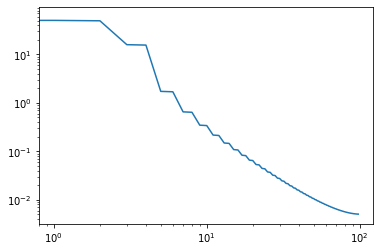

In [87]:
eigenvalues = np.linalg.eigvals(kernel)
# sort in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
plt.loglog(sorted_eigenvalues[:-1])

In [10]:
w1.shape

(1000, 2)

In [4]:
# execute
def calc_NTK_2d(kernel_entry_func, k=1, activation='relu_k'):
    """
    labels = ['relu_k', 'trig', 'laplace']
    """
    num_inputs = 100
    pi = np.pi
    # sin(theta) and cos(theta), theta ~ (0, 2*pi) uniform
    # take 100 points on the unit circle
    theta = np.linspace(0.0, 2 * pi, num=num_inputs)
    x = np.asarray((np.cos(theta), np.sin(theta))) # (2, 100)
  

    # initialize kernel and sample weights
    kernel = np.zeros((num_inputs, num_inputs)) #(100, 100)
    
    
    kernel = 
    
    """plot"""
    eigenvalues = np.linalg.eigvals(kernel)
    # sort in descending order
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    plt.loglog(sorted_eigenvalues[:-1])
    plt.legend(['analytic', 'k=1', 'k=2', 'k=3', 'k=4'])
    
    return kernel

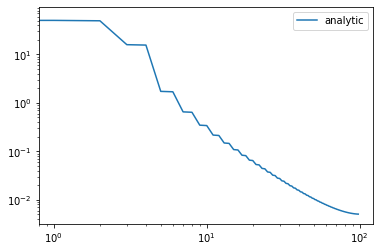

In [5]:
kernel_analytic = calc_NTK_2d(analytic_kernel_entry_2d)


In [ ]:
num_samples = 1000
w1, w2 = np.random.normal(0.0, 1.0, size=[2, num_samples, 2]) # (1000, 2)

In [60]:
a = np.linspace((1,2),(5,10),5).T
b = np.linspace((1,2),(5,10),5)

In [61]:
a.shape

(2, 5)

In [62]:
a

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 2.,  4.,  6.,  8., 10.]])

In [72]:
n = np.linalg.norm(a, axis=0)

In [76]:
n

array([ 2.23606798,  4.47213595,  6.70820393,  8.94427191, 11.18033989])

In [79]:
2.23606798 *6.70820393

15.000000011183161

In [75]:
np.outer(n, n)

array([[  5.,  10.,  15.,  20.,  25.],
       [ 10.,  20.,  30.,  40.,  50.],
       [ 15.,  30.,  45.,  60.,  75.],
       [ 20.,  40.,  60.,  80., 100.],
       [ 25.,  50.,  75., 100., 125.]])

In [63]:
b

array([[ 1.,  2.],
       [ 2.,  4.],
       [ 3.,  6.],
       [ 4.,  8.],
       [ 5., 10.]])

In [71]:
np.linalg.norm(b, axis=1)

array([ 2.23606798,  4.47213595,  6.70820393,  8.94427191, 11.18033989])

In [64]:
b@a

array([[  5.,  10.,  15.,  20.,  25.],
       [ 10.,  20.,  30.,  40.,  50.],
       [ 15.,  30.,  45.,  60.,  75.],
       [ 20.,  40.,  60.,  80., 100.],
       [ 25.,  50.,  75., 100., 125.]])

In [65]:
np.outer(b, a)

array([[  1.,   2.,   3.,   4.,   5.,   2.,   4.,   6.,   8.,  10.],
       [  2.,   4.,   6.,   8.,  10.,   4.,   8.,  12.,  16.,  20.],
       [  2.,   4.,   6.,   8.,  10.,   4.,   8.,  12.,  16.,  20.],
       [  4.,   8.,  12.,  16.,  20.,   8.,  16.,  24.,  32.,  40.],
       [  3.,   6.,   9.,  12.,  15.,   6.,  12.,  18.,  24.,  30.],
       [  6.,  12.,  18.,  24.,  30.,  12.,  24.,  36.,  48.,  60.],
       [  4.,   8.,  12.,  16.,  20.,   8.,  16.,  24.,  32.,  40.],
       [  8.,  16.,  24.,  32.,  40.,  16.,  32.,  48.,  64.,  80.],
       [  5.,  10.,  15.,  20.,  25.,  10.,  20.,  30.,  40.,  50.],
       [ 10.,  20.,  30.,  40.,  50.,  20.,  40.,  60.,  80., 100.]])

In [66]:
np.outer(a, b)

array([[  1.,   2.,   2.,   4.,   3.,   6.,   4.,   8.,   5.,  10.],
       [  2.,   4.,   4.,   8.,   6.,  12.,   8.,  16.,  10.,  20.],
       [  3.,   6.,   6.,  12.,   9.,  18.,  12.,  24.,  15.,  30.],
       [  4.,   8.,   8.,  16.,  12.,  24.,  16.,  32.,  20.,  40.],
       [  5.,  10.,  10.,  20.,  15.,  30.,  20.,  40.,  25.,  50.],
       [  2.,   4.,   4.,   8.,   6.,  12.,   8.,  16.,  10.,  20.],
       [  4.,   8.,   8.,  16.,  12.,  24.,  16.,  32.,  20.,  40.],
       [  6.,  12.,  12.,  24.,  18.,  36.,  24.,  48.,  30.,  60.],
       [  8.,  16.,  16.,  32.,  24.,  48.,  32.,  64.,  40.,  80.],
       [ 10.,  20.,  20.,  40.,  30.,  60.,  40.,  80.,  50., 100.]])